# Importando biblioteca e criando o dataframe

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
arquivo = './dados/ecommerce_estatistica.csv'

In [23]:
df = pd.read_csv(arquivo, index_col=0)

# Análise inicial dos dados

In [24]:
df.columns

Index(['Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca', 'Material',
       'Gênero', 'Temporada', 'Review1', 'Review2', 'Review3', 'Qtd_Vendidos',
       'Preço', 'Nota_MinMax', 'N_Avaliações_MinMax', 'Desconto_MinMax',
       'Preço_MinMax', 'Marca_Cod', 'Material_Cod', 'Temporada_Cod',
       'Qtd_Vendidos_Cod', 'Marca_Freq', 'Material_Freq'],
      dtype='object')

In [25]:
print(df.head().to_string())

                                                                  Título  Nota  N_Avaliações  Desconto            Marca         Material               Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                                                            

Ajustando Temporadas que são idênticas

In [26]:
df['Temporada'].unique()

array(['outono/inverno', 'não definido', 'primavera/verão',
       'primavera-verão outono-inverno', '2021',
       'primavera-verão - outono-inverno',
       'primavera/verão/outono/inverno'], dtype=object)

In [87]:
df['Temporada'] = df['Temporada'].replace('primavera-verão outono-inverno', 'primavera/verão/outono/inverno')
df['Temporada'] = df['Temporada'].replace('primavera-verão - outono-inverno', 'primavera/verão/outono/inverno')

# Histograma de Descontos

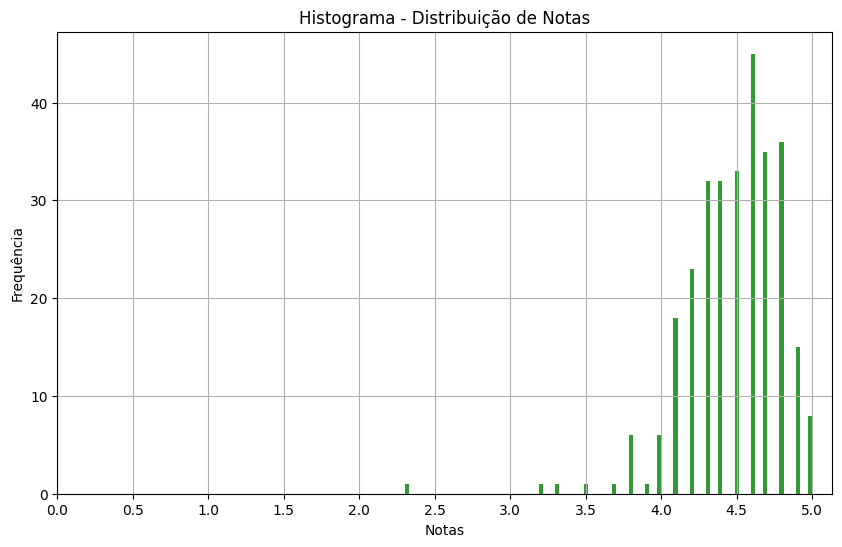

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['Nota'], bins=100, color='green', alpha=0.8)
plt.title('Histograma - Distribuição de Notas')
plt.xlabel('Notas')
plt.xticks(np.arange(0, df['Nota'].max()+0.5, 0.5))
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Dispersão entre Número de Avaliações e Preço

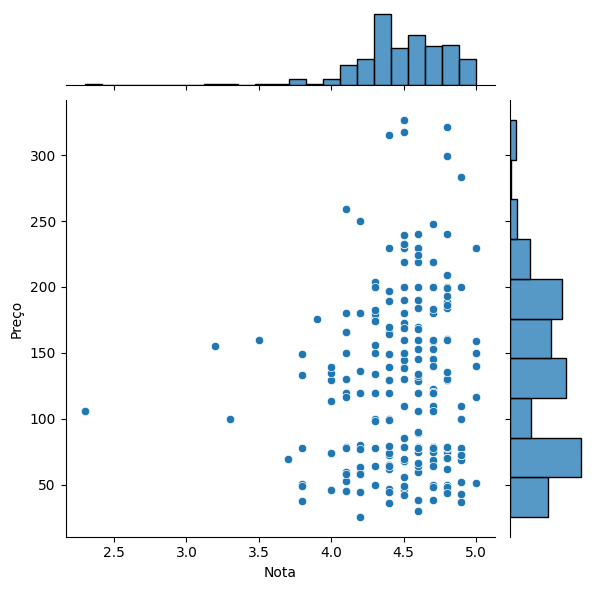

In [29]:
sns.jointplot(x='Nota', y='Preço', data=df, kind='scatter')

# Heatmap de Correlação

In [30]:
df_corr = df[['Nota', 'N_Avaliações', 'Desconto', 'Qtd_Vendidos_Cod', 'Preço',
              'Marca_Cod', 'Material_Cod', 'Temporada_Cod']].corr()

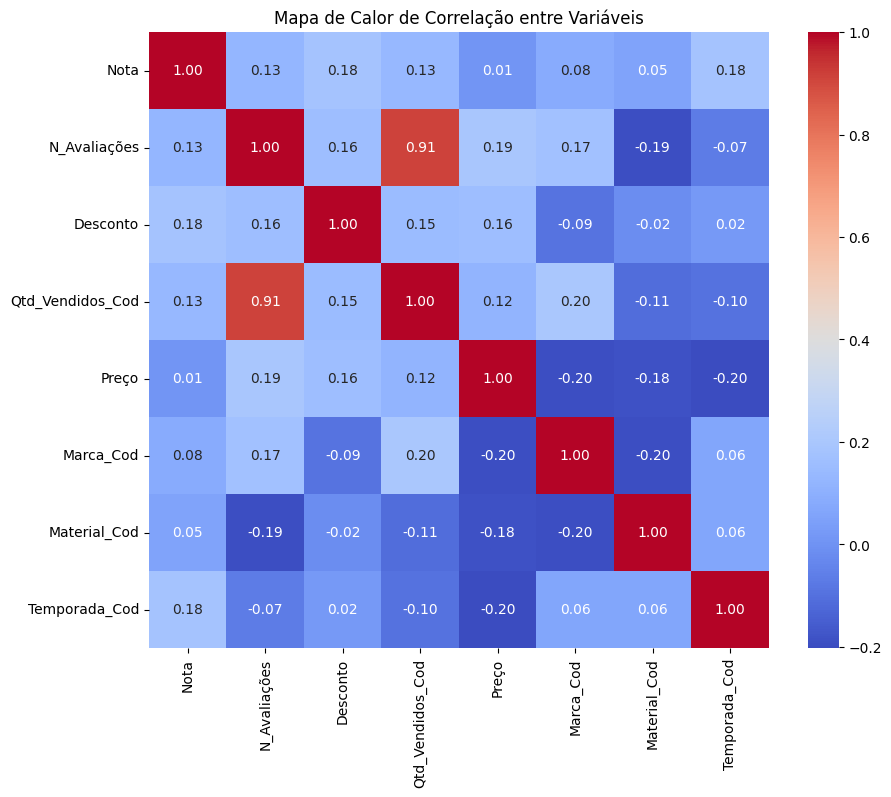

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de Correlação entre Variáveis')
plt.show()

A relação mais clara é entre Número de Avaliações e Quantidade de Itens Vendidos

# Número de vendas das 5 maiores marcas  (Gráfico de Barras)

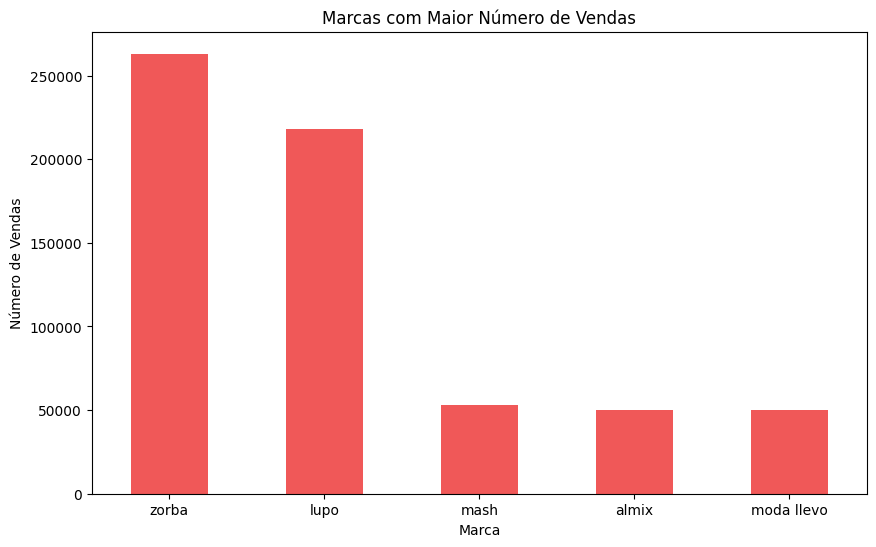

In [32]:
plt.figure(figsize=(10, 6))
df.groupby('Marca')['Qtd_Vendidos_Cod'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color="#EE3A3AD8")
plt.title('Marcas com Maior Número de Vendas')
plt.xlabel('Marca')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.show()

# Distribuição de Temporadas (Gráfico de Pizza)

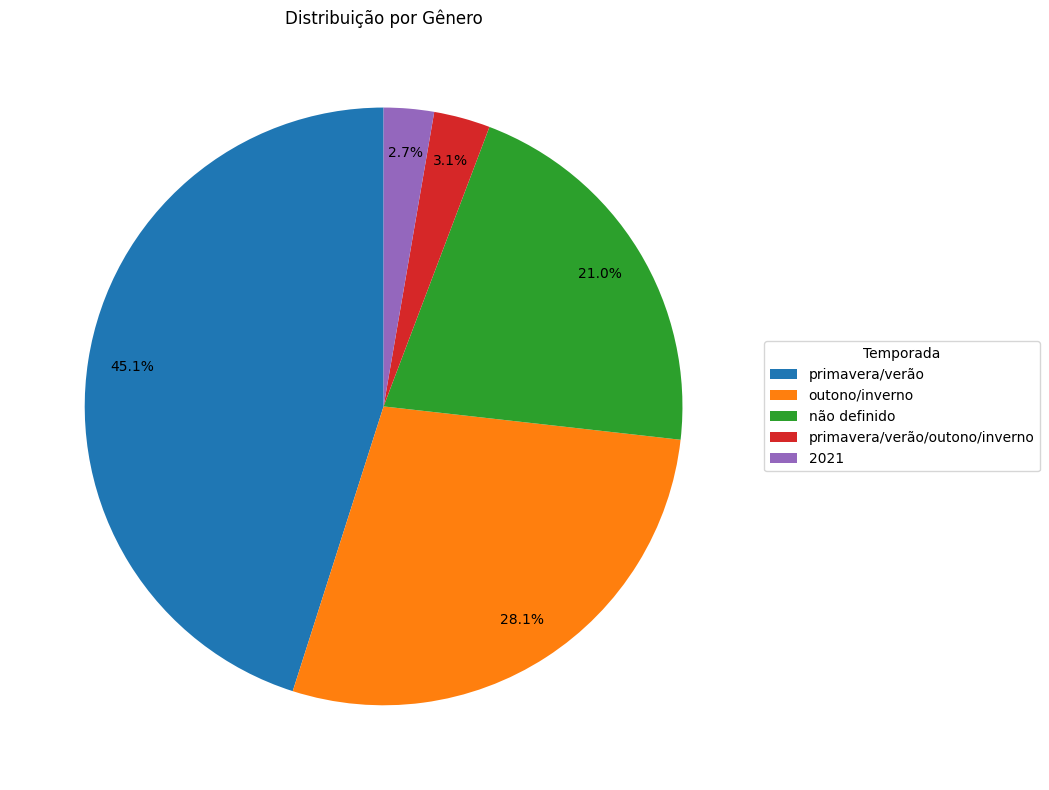

In [35]:
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(y, labels=None, autopct='%.1f%%', 
                                  startangle=90, pctdistance=0.85)
plt.legend(wedges, x, title="Temporada", 
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição por Gênero')
plt.tight_layout()
plt.show()

# Gráfico de Densidade

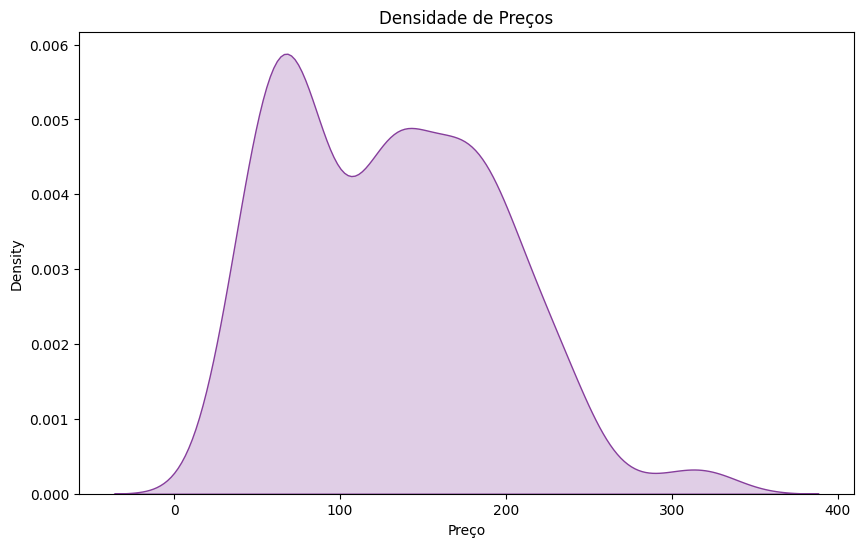

In [37]:
# Gráfico de Densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Preço'], fill=True, color='#863e9c')
plt.title('Densidade de Preços')
plt.xlabel('Preço')
plt.show()

# Gráfico de Regressão

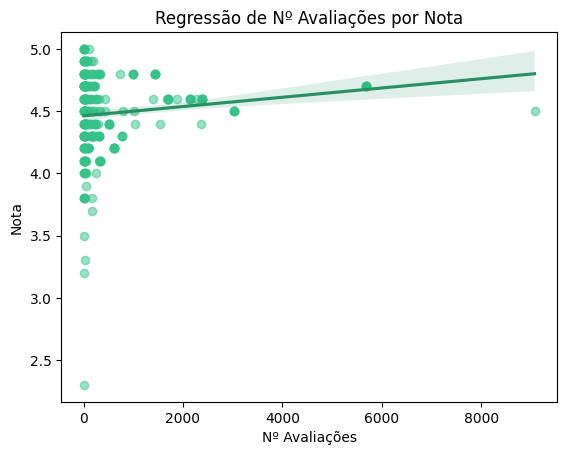

In [86]:
sns.regplot(x='N_Avaliações', y='Nota', data=df, color='#278f65', scatter_kws={'alpha': 0.5, 'color': '#34c289'})
plt.title('Regressão de Nº Avaliações por Nota')
plt.xlabel('Nº Avaliações')
plt.ylabel('Nota')
plt.show()